In [55]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import zero_one_loss
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier       # Used in 2D data problems
from sklearn.linear_model import LogisticRegression  # Used in MNIST data problem


import requests           # we'll use these for reading data from a url
from io import StringIO

import warnings
warnings.filterwarnings('ignore')

# Some keyword arguments for making nice looking decision plots.
plot_kwargs = {'cmap': 'jet',     # another option: viridis
               'response_method': 'predict',
               'plot_method': 'pcolormesh',
               'shading': 'auto',
               'alpha': 0.5,
               'grid_resolution': 100}

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

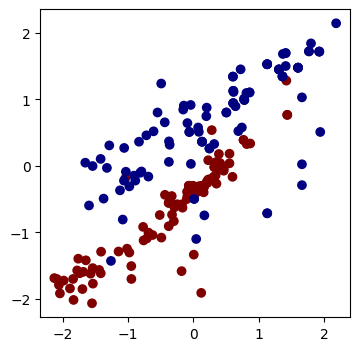

In [56]:
# Load the features and labels from an online text file
url = 'https://sli.ics.uci.edu/extras/cs178/data/nyc_housing.txt'
with requests.get(url) as link:
    datafile = StringIO(link.text)
    nych = np.genfromtxt(datafile,delimiter=',')
    nych_X, nych_y = nych[:,:-1], nych[:,-1]

# Process the data to be only two classes and two real-valued & normalized features:
X, y = nych_X[nych_y<2,:2],nych_y[nych_y<2]
X -= X.mean(axis=0,keepdims=True)  # remove mean
X /= X.std(axis=0,keepdims=True)   # & scale
y = 2*y - 1                        # classical binary: positive/negative

# Visualize the resulting dataset:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='jet');